#Introduction

##MNIST Data
MNIST is ‘Modified National Institute of Standards and Technology’. This database consists of handwritten digits from 0 to 9 and it provides a pavement for testing image processing systems.

#1. Importing Dataset

Keras has been maintaining some well known datasets in its package. You can check more datasets here - https://keras.io/api/datasets/

In [ ]:
from keras.datasets import mnist

data = mnist.load_data()

The output returned by .load_data() is of datatype 'Tuple'. Which contains the raw data devided in 4 subs in the following way - X_train, y_train, X_test, y_test.

If you are interested in exploring the proportion of the split use the link mentioned above.

#2. Split the Dataset into Test and Train

This is achived by tuple unpacking, nothing fancy here.

In [ ]:
(X_train, y_train), (X_test, y_test) = data

In order to have a vision about your neural network, the basic thing is to know the shape of your data in the first place, then move ahead with any sort of manipulations (if reqd).

.shape returns the dimensions of the data such as the number of data points, length, width & # channels

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

It is always a good idea to scrutinize a random data entry from either the train or the test data.

In [ ]:
X_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

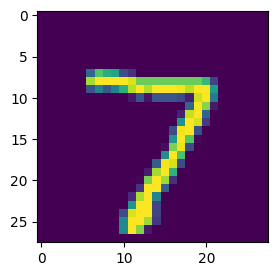

In [ ]:
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = (4,3)
plt.imshow(X_test[0])
plt.show()

Also to check the shape of the entry mentioned above.

Note - Try comparing the shape of the whole data we had found out earlier in the notebook with the shape of an instance. Did you find anything similar. What makes them different?

In [ ]:
X_train[0].shape

(28, 28)

In [ ]:
X_train.shape

(60000, 28, 28)

Normalization/ Scaling helps our model to learn & train well.

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

Since we need to explicitely make sure the last layer should contain the 10 classes as 10 neurons we will have to transform the current y_train to One Hot Encoded form.

In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Feel free to use keras or any alternative to achieve so.

In [ ]:
from keras.utils import np_utils

print(y_test.shape)

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

num_classes = y_test.shape[1]

print(y_test.shape)

(10000,)
(10000, 10)


In [ ]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

#3. Model Building

Dense layers are the independent layers which the model (sequential here) will stitch together to form a neural network we intend.

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

Model is your canvas feel free to tinker around layers, neurons and other parameters. Just make sure it efficiently achieves the results at the end of the day :)

In [ ]:
model = Sequential()

model.add(Conv2D(kernel_size = (3,3),strides = (1,1), padding = 'valid',filters = 10, activation = 'relu', \
                 input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides = (2,2)))

model.add(Flatten())
model.add(Dense(10, activation  = 'softmax'))

However this step is new for us. Our basic idea is the parameters mentioned should commensurate the basic principles of the use-case.

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy','AUC'])

You can visualize your model and its layers, probably cross check the parameters etc.

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 10)        100       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 10)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1690)              0         
                                                                 
 dense (Dense)               (None, 10)                16910     
                                                                 
Total params: 17,010
Trainable params: 17,010
Non-trainable params: 0
_________________________________________________________________


#4. Train the model

We have seen .fit() before in ML modeling. Here we can add more params like epochs, batch_size and more. Which would help our model to efficiently learn until the training converges.

Fun fact - You can even stop before if the model is accurate enough to solve your case.

In [ ]:
model.fit(X_train, y_train, epochs= 5)

Epoch 1/5
1875/1875 [==============================] - 36s 19ms/step - loss: 0.3278 - accuracy: 0.9068 - auc: 0.9920
Epoch 2/5
1875/1875 [==============================] - 26s 14ms/step - loss: 0.1452 - accuracy: 0.9584 - auc: 0.9977
Epoch 3/5
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0995 - accuracy: 0.9718 - auc: 0.9987
Epoch 4/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0788 - accuracy: 0.9772 - auc: 0.9990
Epoch 5/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0670 - accuracy: 0.9802 - auc: 0.9991


Now, thats quite lot of information printed on the screen.
The proportion mentioned right under 'Epoch' depicts the number of passes we will have to do - GIVEN the batch size (default is 32).   

#5. Predicting Accuracy

Looking for data to test your model on. Sure, for what did we keep our test data for.

In [ ]:
pred = model.predict(X_test)
pred[0]

313/313 [==============================] - 2s 5ms/step


array([3.0448945e-08, 2.0667571e-08, 3.8605699e-06, 7.6265373e-05,
       9.6935104e-10, 1.0865315e-08, 4.1471438e-13, 9.9991626e-01,
       6.5299169e-08, 3.3869881e-06], dtype=float32)

If required do the basic manipulation to interpret the prediction (s) of our trained neural network, see how well it is able to perform.

In [ ]:
[round(i,3) for i in pred[0]]

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]

In [ ]:
max_value = max(pred[0])
index = list(pred[0]).index(max_value)
index

7

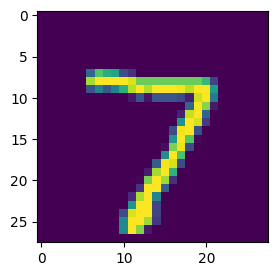

In [ ]:
X_test_plt = X_test.reshape((X_test.shape[0], 28, 28)).astype('float32')

plt.rcParams["figure.figsize"] = (3,3)
plt.imshow(X_test_plt[0])
plt.show()

Finally, check the viability of the model by evaluating the scores of the whole test data.

In [ ]:
scores = model.evaluate(X_test, y_test)
print('Accuracy: ',scores[1] * 100)

313/313 [==============================] - 3s 9ms/step - loss: 0.0692 - accuracy: 0.9766 - auc: 0.9993
Accuracy:  97.65999913215637
